In [140]:
import matplotlib.pyplot as plt
import pandas as pd


In [134]:
train_df = pd.read_csv('train.csv')
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


EDA

In [135]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [136]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [137]:
train_df.price_range.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

Visualization 

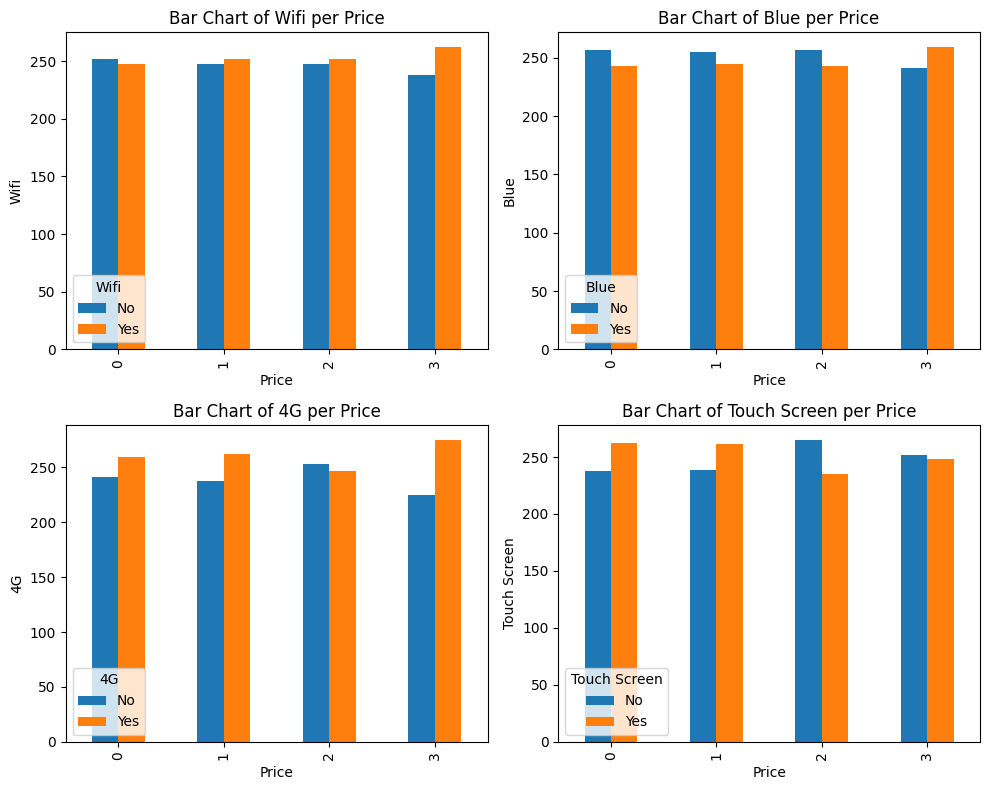

In [141]:
fig_bar, axs_bar = plt.subplots(2, 2, figsize=(10, 8))

# Wifi plot

aggregation_data_wifi = train_df.groupby(['price_range', 'wifi']).size().unstack(fill_value=0)


ax_wifi = aggregation_data_wifi.plot(kind='bar',ax=axs_bar[0,0])

axs_bar[0, 0].set_xlabel('Price')
axs_bar[0, 0].set_ylabel('Wifi')
axs_bar[0, 0].set_title('Bar Chart of Wifi per Price')
axs_bar[0, 0].legend(title='Wifi', labels=['No','Yes'], loc='lower left')



# Blue plot
aggregation_data_blue = train_df.groupby(['price_range', 'blue']).size().unstack(fill_value=0)


ax_blue = aggregation_data_blue.plot(kind='bar',ax=axs_bar[0, 1])

axs_bar[0, 1].set_xlabel('Price')
axs_bar[0, 1].set_ylabel('Blue')
axs_bar[0, 1].set_title('Bar Chart of Blue per Price')
axs_bar[0, 1].legend(title='Blue', labels=['No','Yes'], loc='lower left')


# 4G plot

aggregation_data_four_g = train_df.groupby(['price_range', 'four_g']).size().unstack(fill_value=0)

ax_four_g = aggregation_data_four_g.plot(kind='bar', ax=axs_bar[1,0])

axs_bar[1, 0].set_xlabel('Price')
axs_bar[1, 0].set_ylabel('4G')
axs_bar[1, 0].set_title('Bar Chart of 4G per Price')
axs_bar[1, 0].legend(title='4G', labels=['No','Yes'], loc='lower left')

# Touch screen plot

aggregation_data_touch_screen = train_df.groupby(['price_range', 'touch_screen']).size().unstack(fill_value=0)

ax_touch_screen = aggregation_data_touch_screen.plot(kind='bar',ax=axs_bar[1, 1])

axs_bar[1, 1].set_xlabel('Price')
axs_bar[1, 1].set_ylabel('Touch Screen')
axs_bar[1, 1].set_title('Bar Chart of Touch Screen per Price')
axs_bar[1, 1].legend(title='Touch Screen', labels=['No','Yes'], loc='lower left')





plt.tight_layout()
plt.show()






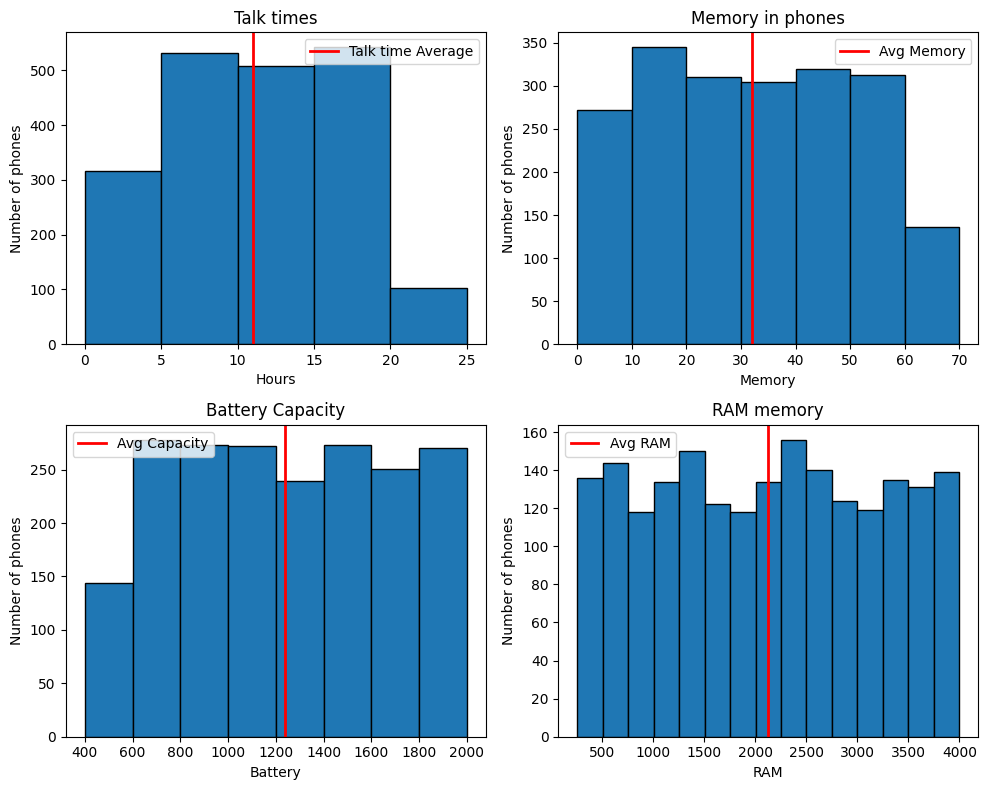

In [142]:
fig_hist, axs_hist = plt.subplots(2, 2, figsize=(10, 8))

# Talk time plot
bins_talk_time = [0,5, 10, 15, 20, 25]

average_talk_time = train_df['talk_time'].mean()

axs_hist[0, 0].hist(train_df['talk_time'], bins=bins_talk_time, edgecolor='black')

axs_hist[0, 0].axvline(average_talk_time, color='red', label='Talk time Average', linewidth=2)

axs_hist[0, 0].legend(loc='upper right')

axs_hist[0, 0].set_title('Talk times')
axs_hist[0, 0].set_xlabel('Hours')
axs_hist[0, 0].set_ylabel('Number of phones')


# Internal Memory plot

bins_memory = [0, 10, 20, 30, 40, 50, 60, 70]

average_talk_time = train_df['int_memory'].mean()

axs_hist[0, 1].hist(train_df['int_memory'], bins=bins_memory, edgecolor='black')

axs_hist[0, 1].axvline(average_talk_time, color='red', label='Avg Memory', linewidth=2)

axs_hist[0, 1].set_title('Memory in phones')
axs_hist[0, 1].set_xlabel('Memory')
axs_hist[0, 1].set_ylabel('Number of phones')

axs_hist[0, 1].legend(loc='upper right')

#Battery capacity plot

bins_battery = [400,600, 800,1000,1200, 1400,1600,1800, 2000]

average_talk_time = train_df['battery_power'].mean()

axs_hist[1, 0].hist(train_df['battery_power'], bins=bins_battery, edgecolor='black')

axs_hist[1, 0].axvline(average_talk_time, color='red', label='Avg Capacity', linewidth=2)

axs_hist[1, 0].set_title('Battery Capacity')
axs_hist[1, 0].set_xlabel('Battery')
axs_hist[1, 0].set_ylabel('Number of phones')

axs_hist[1, 0].legend(loc='upper left')

# RAM memory plot

average_talk_time = train_df['ram'].mean()

axs_hist[1, 1].hist(train_df['ram'], bins=15, edgecolor='black')

axs_hist[1, 1].axvline(average_talk_time, color='red', label='Avg RAM', linewidth=2)

axs_hist[1, 1].set_title('RAM memory')
axs_hist[1, 1].set_xlabel('RAM')
axs_hist[1, 1].set_ylabel('Number of phones')

axs_hist[1, 1].legend(loc='upper left')





plt.tight_layout()
plt.show()



